<a href="https://colab.research.google.com/github/Amrith-ops/Identify-the-Sentiment/blob/master/RecommendationSystem_TruncatedSVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





















































































































# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula</pre>$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $
 <pre>
    print the mean squared error with predicted ratings
    </pre>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [ ]:
import pandas as pd
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ratings_train.csv')

In [ ]:
import pandas as pd
import numpy as np
ratings=pd.read_csv('ratings_train.csv')
print(ratings.shape)
ratings.head()


(89992, 3)


,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
downloaded = drive.CreateFile({'id':'1RFjjrXS1qCWCc_yx8KDJJtVSxs_khLYS'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Copy of user_info.csv')

In [ ]:
user_male=pd.read_csv('Copy of user_info.csv',sep=',',header=None)
user_male.columns=user_male.loc[0,:]
user_male.head()
user_male=user_male.loc[1:,:]
user_male.head()

,user_id,age,is_male,orig_user_id
1,0,24,1,1
2,1,53,0,2
3,2,23,1,3
4,3,24,1,4
5,4,33,0,5


In [ ]:
user=ratings['user_id'].values
user_unique,user_count=np.unique(user,return_counts=True)
print(len(user_unique),'total number of users')

943 total number of users


Do lot of people watch lots of movies or does only some people watch lots of movies?

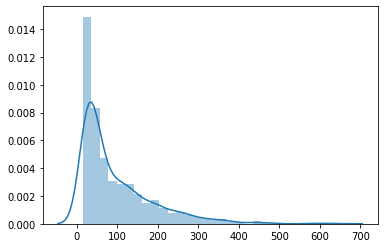

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
user_sb=sb.distplot(user_count)
user_sb

Text(0, 0.5, 'No of movies watched by each user')

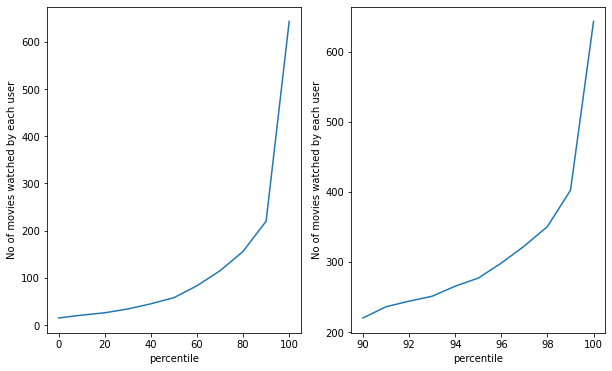

In [ ]:
percentile=np.percentile(user_count,np.arange(0,110,10))
percent=np.arange(0,110,10)
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax1.plot(percent,percentile)
ax1.set_xlabel('percentile')
ax1.set_ylabel('No of movies watched by each user')
percentile1=np.percentile(user_count,np.arange(90,101,1))
percent1=np.arange(90,101,1)
ax2.plot(percent1,percentile1)
ax2.set_xlabel('percentile')
ax2.set_ylabel('No of movies watched by each user')


Observation:
90 percent of the people watch less than or equal to 200 movies.
5 percent of the people watch more than or equal to 300 movies.
less than one percent of people watch more than 600 movies.
Since most of the users watch very less movies,our user movie matrix will have lot of empty values so it will be a sparse matrix.

Do lot of movies watched by lot of people or does only few movies are watched by lots of users

In [ ]:
movie_unique,count_movie=np.unique(ratings['item_id'].values,return_counts=True)
print(len(movie_unique),'total number of movies')


1662 total number of movies


In [ ]:
print(count_movie)

[406 116  86 ...   1   1   1]


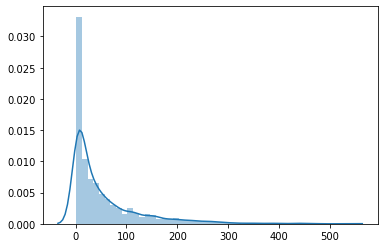

In [ ]:
movies_sb=sb.distplot(count_movie)

Text(0, 0.5, 'No of users watched a given movie')

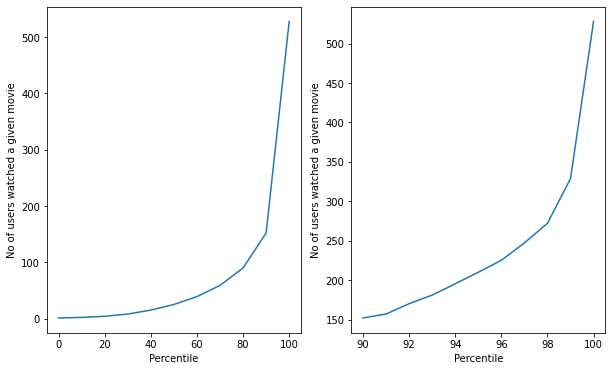

In [ ]:
movie_percentile=np.percentile(count_movie,np.arange(0,110,10))
per_movie=np.arange(0,110,10)
movie_percentile1=np.percentile(count_movie,np.arange(90,101,1))
per_movie1=np.arange(90,101,1)
fig,(ax3,ax4)=plt.subplots(1,2,figsize=(10,6))
ax3.plot(per_movie,movie_percentile)
ax3.set_xlabel('Percentile')
ax3.set_ylabel('No of users watched a given movie')
ax4.plot(per_movie1,movie_percentile1)
ax4.set_xlabel('Percentile')
ax4.set_ylabel('No of users watched a given movie')

Observation:
85% of the movies are watched by less than 100 users.
Only 3% of the movies are watched by 300 users.
Less than one percent of the movies are watched by greater than 500 users

#Which ratings are given most by the people?

4    30771
3    24412
5    19062
2    10248
1     5499
Name: rating, dtype: int64


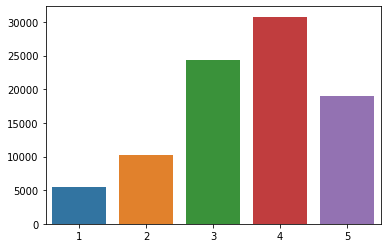

In [ ]:
count_rating=ratings['rating'].value_counts()
print(count_rating)
rating_sb=sb.barplot(x=count_rating.keys(),y=count_rating.values)

In [ ]:
ratings.head(20)
ratings=ratings.reset_index(drop=True)
ratings.head(10)
movie_user=ratings
y=movie_user['rating']
movie_user.drop(columns='rating')
movie_user.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(movie_user,y,test_size=0.3,random_state=21)
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
X_trunique=np.unique(X_train['user_id'].values)
X_trunique=set(X_trunique)
X_cvunique=np.unique(X_cv['user_id'].values)
X_cvunique=set(X_cvunique)
X_diffuser=len(X_cvunique-X_trunique)
print(X_diffuser)  #No of points which are there in test data but not in train data are Zero so no Coldstart problem
print(len(X_trunique-X_cvunique)) #All points which are there in train data present in test data also for users
X_movunique=np.unique(X_train['item_id'].values)
Xcv_movunique=np.unique(X_cv['item_id'].values)
X_movunique=set(X_movunique)
Xcv_movunique=set(Xcv_movunique)
print(len(Xcv_movunique-X_movunique))#No of points which are there in test data but not in train data
print(len(X_movunique-Xcv_movunique)) #No of points which are there in train data but not in test data
#Unfortunately there are 34 points in test data which are not even seen in train data so there is a Cold start w.r.t movies
print((len(Xcv_movunique-X_movunique)/(X_cv.shape[0]))*100,'% of points present in the Test data but not in Train data')

(62994, 3) (62994,)
(26998, 3) (26998,)
0
0
57
183
0.21112675012963925 % of points present in the Test data but not in Train data


In [ ]:
X_train.loc[1129]
X_train[X_train['user_id']==238].reset_index().sort_values(by='index')

,index,user_id,item_id,rating
76,325,238,526,5
54,430,238,310,2
91,503,238,203,3
32,615,238,237,5
93,1129,238,64,5
...,...,...,...,...
4,87725,238,631,5
19,87789,238,113,3
59,88184,238,133,5
85,88768,238,480,3


In [ ]:
ratings.info()
print(X_cv.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89992 entries, 0 to 89991
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  89992 non-null  int64
 1   item_id  89992 non-null  int64
 2   rating   89992 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB
(26998, 3)


In [ ]:
from scipy.sparse import csr_matrix
no_movies=len(np.unique(ratings['item_id'].values))
user_movie=csr_matrix((ratings['rating'].values,(ratings['user_id'].values,ratings['item_id'].values)),)
print(user_movie.shape)

(943, 1681)


In [ ]:
alpha=[0.001,0.01,0.1,1,10,50]
latent_factors=[60,70,80,90,100,110]
hyperparameters=list(zip(alpha,latent_factors))
print(hyperparameters)
average_rating=np.mean(X_train['rating'].values)
print(average_rating)

[(0.001, 60), (0.01, 70), (0.1, 80), (1, 90), (10, 100), (50, 110)]
3.5332253865447503


Step1:decide the train dataset and cv dataset and build it.
Check whether the data which is present in train dataset is also present in test dataset,because the values which are learned for  different parameters in train dataset will be used in test data.
If any row or instance which is present in test data but not in train data,then take the average of parameter values(i.e user_bias or movie_bias). 

Step2:Taking batch size=1 in sgd algorithm.

Step3:Choose the hyperparameter range.Here the hyperparameters are latent factors(i.e no of features for user or movie matrix) and regularization strength alpha.
Decide number of epochs

Step4:calculate the predicted value

Step5:Calculate the loss on train and cv once weights are updated

Step6:Average the training loss and test loss for all the batches.

So for every epoch you get the average training and cv loss.

Step7:Append the average loss to the epoch list and again average it.

Step8:Finally that gives us loss vs hyperparameter


Understanding the Recommendation Problem:

Comparing the Machine learning problem approach and recommendation problem approach.In machine learning problem approach given a row/observation and a particular feature our job is find the appropriate weight to it.
In recommendation problem,given a user and movie what is the rating to be given to missing values?

The difference in recommendation problem is unlike in machine learning problem,
we dont have a feature vector(i.e X) instead given with Yi values as,hence our task is to convert the recomendation problem to machine learning problem i.e take ratings as actual Yi value.Then build two matrices which are feature vectors for user and feature vector for movie hence they represent X and W matrices.
Using the Yi and predicted Yi we have to optimize the given problem.
Note: In machine learning problem we are just optimizing W values here we have to optimize two matrices i.e User and movie matrix(thinking them like X and W) values.


In [ ]:
from tqdm import tqdm
def recommendation_system(hyperparameters,no_users,no_movies,X_train,X_cv,eta,epoch,average_rating):
  user_bias=np.zeros(no_users) #Array index corresponds to user_id and value inside it corresponds to user bias
  movie_bias=np.zeros(no_movies) #Array index corresponds to movie_id and the value inside it corresponds to movie bias
  hyperparameter_tr=[]
  hyperparameter_cv=[]
  for alpha,latent_factors in tqdm(hyperparameters):
    user_matrix=np.random.uniform(low=-1,high=1,size=no_users*latent_factors).reshape(no_users,latent_factors) #Initializing the user and movie matrix with the values taken at random from Uniform distribution.
    movie_matrix=np.random.uniform(low=-1,high=1,size=no_movies*latent_factors).reshape(no_movies,latent_factors)
    epoch_losstr=[]    #These lists store epoch loss for train and test/cv data.
    epoch_losscv=[]
    for j in range(epoch):
      print(j,'epoch')
      train_loss=0
      count=0
      for index,series in X_train.iterrows():
          count+=1
          user=int(series[0])
          item=int(series[1])
          rating=int(series[2])
          user_biasval=user_bias[user]       #Picking the values from user_bias and movie_bias and user_row,movie_row
          movie_biasval=movie_bias[item]
          user_matrixval=user_matrix[user,:]
          movie_matrixval=movie_matrix[item,:]
          dot=user_matrixval.dot(movie_matrixval.T)
          predicted=average_rating+user_biasval+movie_biasval  #Using the average and user/movie bias and dot product b/w user and movie row we can have predicted value.
          predicted=predicted+dot
          gradient_user=(2*(rating-predicted)-2*alpha*user_biasval)  #Finding gradient/slope for each user and movie and user row and movie row and adding it to initial values.
          user_bias[user]=user_biasval+eta*gradient_user
          gradient_movie=(2*(rating-predicted)-2*alpha*movie_biasval)
          movie_bias[item]=movie_biasval+eta*gradient_movie
          gradient_usermatrix=(2*(rating-predicted)*movie_matrixval-2*alpha*user_matrixval)
          user_matrix[user,:]=user_matrixval+eta*gradient_usermatrix
          gradient_moviematrix=(2*(rating-predicted)*user_matrixval-2*alpha*movie_matrixval)
          movie_matrix[item,:]=movie_matrixval+eta*gradient_moviematrix
          train_loss+=(rating-predicted)**2                             #Calculating square loss for all points and averaging it over all points gives train loss.
      train_loss=train_loss/(X_train.shape[0])
      epoch_losstr.append(train_loss)
      print(epoch_losstr,'trainloss')
      cv_loss=0
      for index1,series1 in X_cv.iterrows():
        user1=series1[0]
        item1=series1[1]
        rating1=series1[2]
        if not any((X_train['item_id']==item1)):    #While doing data analysis i found that there are some movie items which are present in test data but not train data
          moviecv_biasval=np.mean(movie_bias)       #Hence finding such values,filling it with average of all movie_bias values because these dont have any learned parameters while training.
        else:
          moviecv_biasval=movie_bias[item1]
        usercv_biasval=user_bias[user1]
        usercv_matrixval=user_matrix[user1]
        moviecv_matrixval=movie_matrix[item1]
        predictedcv=average_rating+usercv_biasval+moviecv_biasval+usercv_matrixval.dot(moviecv_matrixval.T)
        cv_loss+=(rating1-predicted)**2
      cv_loss=cv_loss/(X_cv.shape[0])
      epoch_losscv.append(cv_loss)                    #Finding average cv loss and appending to epoch loss list
      print(epoch_losscv,'losscv')
    epochtr_average=np.array(epoch_losstr).mean()
    epochcv_average=np.array(epoch_losscv).mean()
  hyperparameter_tr.append(epochtr_average)          #Average all the epoch loss of train and cv to give the hyperparameters vs loss in train and test data.
  hyperparameter_cv.append(epochcv_average)
  return(hyperparameter_tr,hyperparameter_cv)

hyperparameter_tr,hyperparameter_cv=recommendation_system(hyperparameters,943,1681,X_train,X_cv,0.001,10,average_rating)
















  0%|          | 0/6 [00:00<?, ?it/s]

0 epoch
[6.947325033161882] trainloss
[2.3032648411304524] losscv
1 epoch
[6.947325033161882, 4.819695506791063] trainloss
[2.3032648411304524, 2.0841428009993006] losscv
2 epoch
[6.947325033161882, 4.819695506791063, 3.629980182440994] trainloss
[2.3032648411304524, 2.0841428009993006, 1.9273692095650459] losscv
3 epoch
[6.947325033161882, 4.819695506791063, 3.629980182440994, 2.881578695377469] trainloss
[2.3032648411304524, 2.0841428009993006, 1.9273692095650459, 1.8091704603724057] losscv
4 epoch
[6.947325033161882, 4.819695506791063, 3.629980182440994, 2.881578695377469, 2.3736989081110416] trainloss
[2.3032648411304524, 2.0841428009993006, 1.9273692095650459, 1.8091704603724057, 1.7176735396557645] losscv
5 epoch
[6.947325033161882, 4.819695506791063, 3.629980182440994, 2.881578695377469, 2.3736989081110416, 2.01009081068581] trainloss
[2.3032648411304524, 2.0841428009993006, 1.9273692095650459, 1.8091704603724057, 1.7176735396557645, 1.6457299032037351] losscv
6 epoch
[6.9473250
















 17%|█▋        | 1/6 [03:47<18:55, 227.14s/it]

[2.3032648411304524, 2.0841428009993006, 1.9273692095650459, 1.8091704603724057, 1.7176735396557645, 1.6457299032037351, 1.588538637507863, 1.5426803406536458, 1.5056413861961913, 1.4755396689229359] losscv
0 epoch
[7.71489912249437] trainloss
[9.514243979327139] losscv
1 epoch
[7.71489912249437, 5.20337018211245] trainloss
[9.514243979327139, 7.076152395214075] losscv
2 epoch
[7.71489912249437, 5.20337018211245, 3.8272589689520258] trainloss
[9.514243979327139, 7.076152395214075, 5.546450286308447] losscv
3 epoch
[7.71489912249437, 5.20337018211245, 3.8272589689520258, 2.976361243028624] trainloss
[9.514243979327139, 7.076152395214075, 5.546450286308447, 4.5256771293226254] losscv
4 epoch
[7.71489912249437, 5.20337018211245, 3.8272589689520258, 2.976361243028624, 2.407641402041763] trainloss
[9.514243979327139, 7.076152395214075, 5.546450286308447, 4.5256771293226254, 3.814860271630049] losscv
5 epoch
[7.71489912249437, 5.20337018211245, 3.8272589689520258, 2.976361243028624, 2.407641
















 33%|███▎      | 2/6 [07:30<15:03, 225.98s/it]

[9.514243979327139, 7.076152395214075, 5.546450286308447, 4.5256771293226254, 3.814860271630049, 3.3035654926745948, 2.925881969450883, 2.6404165106044197, 2.4201799256931436, 2.2470558877852183] losscv
0 epoch
[8.319365016480674] trainloss
[1.5004589558662813] losscv
1 epoch
[8.319365016480674, 5.167359054134008] trainloss
[1.5004589558662813, 1.2927665368167143] losscv
2 epoch
[8.319365016480674, 5.167359054134008, 3.5799317863453632] trainloss
[1.5004589558662813, 1.2927665368167143, 1.2675926673769393] losscv
3 epoch
[8.319365016480674, 5.167359054134008, 3.5799317863453632, 2.6577671815926784] trainloss
[1.5004589558662813, 1.2927665368167143, 1.2675926673769393, 1.288642246012485] losscv
4 epoch
[8.319365016480674, 5.167359054134008, 3.5799317863453632, 2.6577671815926784, 2.0725978275361685] trainloss
[1.5004589558662813, 1.2927665368167143, 1.2675926673769393, 1.288642246012485, 1.3156399994710681] losscv
5 epoch
[8.319365016480674, 5.167359054134008, 3.5799317863453632, 2.6577
















 50%|█████     | 3/6 [11:17<11:19, 226.38s/it]

[1.5004589558662813, 1.2927665368167143, 1.2675926673769393, 1.288642246012485, 1.3156399994710681, 1.3372660702462849, 1.351561370315395, 1.3594607004389683, 1.362553935486621, 1.3623359292267292] losscv
0 epoch
[6.976221750682379] trainloss
[1.6029515082244148] losscv
1 epoch
[6.976221750682379, 2.7669966787000195] trainloss
[1.6029515082244148, 1.4888761409708469] losscv
2 epoch
[6.976221750682379, 2.7669966787000195, 1.6173812610403937] trainloss
[1.6029515082244148, 1.4888761409708469, 1.4003411378339408] losscv
3 epoch
[6.976221750682379, 2.7669966787000195, 1.6173812610403937, 1.1984919131184977] trainloss
[1.6029515082244148, 1.4888761409708469, 1.4003411378339408, 1.3460103444474805] losscv
4 epoch
[6.976221750682379, 2.7669966787000195, 1.6173812610403937, 1.1984919131184977, 1.0217100250883546] trainloss
[1.6029515082244148, 1.4888761409708469, 1.4003411378339408, 1.3460103444474805, 1.3141937644661228] losscv
5 epoch
[6.976221750682379, 2.7669966787000195, 1.617381261040393
















 67%|██████▋   | 4/6 [15:04<07:32, 226.45s/it]

[1.6029515082244148, 1.4888761409708469, 1.4003411378339408, 1.3460103444474805, 1.3141937644661228, 1.295368796674306, 1.2839195284999882, 1.2767791075190085, 1.2722787765566113, 1.2694811758782503] losscv
0 epoch
[2.5640549800752415] trainloss
[1.2691255502091319] losscv
1 epoch
[2.5640549800752415, 1.1587932475349991] trainloss
[1.2691255502091319, 1.267774364395636] losscv
2 epoch
[2.5640549800752415, 1.1587932475349991, 1.1594071209092855] trainloss
[1.2691255502091319, 1.267774364395636, 1.2674957816288033] losscv
3 epoch
[2.5640549800752415, 1.1587932475349991, 1.1594071209092855, 1.1677578971321803] trainloss
[1.2691255502091319, 1.267774364395636, 1.2674957816288033, 1.267336770688167] losscv
4 epoch
[2.5640549800752415, 1.1587932475349991, 1.1594071209092855, 1.1677578971321803, 1.1735993846646329] trainloss
[1.2691255502091319, 1.267774364395636, 1.2674957816288033, 1.267336770688167, 1.2672572506976396] losscv
5 epoch
[2.5640549800752415, 1.1587932475349991, 1.1594071209092
















 83%|████████▎ | 5/6 [18:52<03:46, 226.91s/it]

[1.2691255502091319, 1.267774364395636, 1.2674957816288033, 1.267336770688167, 1.2672572506976396, 1.2672175106422776, 1.2671968881171891, 1.267185578026493, 1.26717895608247, 1.2671748064047148] losscv
0 epoch
[1.5942582160697891] trainloss
[1.2670961133286855] losscv
1 epoch
[1.5942582160697891, 1.2453833510432588] trainloss
[1.2670961133286855, 1.2671249559974367] losscv
2 epoch
[1.5942582160697891, 1.2453833510432588, 1.2474000374198464] trainloss
[1.2670961133286855, 1.2671249559974367, 1.2671251278670659] losscv
3 epoch
[1.5942582160697891, 1.2453833510432588, 1.2474000374198464, 1.2482650475221115] trainloss
[1.2670961133286855, 1.2671249559974367, 1.2671251278670659, 1.267125044822247] losscv
4 epoch
[1.5942582160697891, 1.2453833510432588, 1.2474000374198464, 1.2482650475221115, 1.2487231909419119] trainloss
[1.2670961133286855, 1.2671249559974367, 1.2671251278670659, 1.267125044822247, 1.2671250135018082] losscv
5 epoch
[1.5942582160697891, 1.2453833510432588, 1.2474000374198
















100%|██████████| 6/6 [22:40<00:00, 226.74s/it]

[1.2670961133286855, 1.2671249559974367, 1.2671251278670659, 1.267125044822247, 1.2671250135018082, 1.267125001600876, 1.2671249969568286, 1.267124995158969, 1.2671249944977743, 1.2671249942877525] losscv


In [ ]:
print(hyperparameter_tr)
print(hyperparameter_cv)

[2.85330642, 2.98158725821265, 2.8046766110309673, 1.8059126542405401, 1.313044366328197, 1.2830378239732962]
[1.75997507, 4.401448384801059, 1.3438278411257485, 1.355020028107097, 1.2674943456892522, 1.2671221238019441]


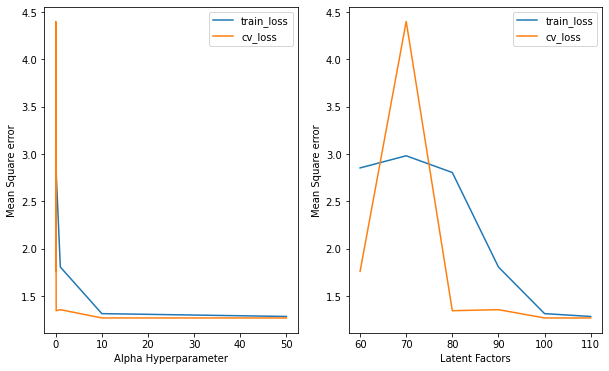

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax1.plot(alpha,hyperparameter_tr,label='train_loss')
ax1.plot(alpha,hyperparameter_cv,label='cv_loss')
ax1.set_xlabel('Alpha Hyperparameter')
ax1.set_ylabel('Mean Square error')
ax1.legend()
ax2.plot(latent_factors,hyperparameter_tr,label='train_loss')
ax2.plot(latent_factors,hyperparameter_cv,label='cv_loss')
ax2.set_xlabel('Latent Factors')
ax2.set_ylabel('Mean Square error')
ax2.legend()

Observation:
Choosing the number of features i.e 100 features and alpha value to be 10 gives low mean square error(MSE).

In [ ]:
def recommendation(no_users,no_movies,best_latentfactors,epoch,X_train,X_cv,eta,alpha,average_rating): #After finding the best hyperparameters now were finding user_bias,movie_bias,user/movie matrix.
  user_bias=np.zeros(no_users) #Array index corresponds to user_id and value inside it corresponds to user bias
  movie_bias=np.zeros(no_movies) #Array index corresponds to movie_id and the value inside it corresponds to movie bias
  user_matrix=np.random.uniform(low=-1,high=1,size=no_users*best_latentfactors).reshape(no_users,best_latentfactors)
  movie_matrix=np.random.uniform(low=-1,high=1,size=no_movies*best_latentfactors).reshape(no_movies,best_latentfactors)
  epoch_losstr=[]
  epoch_losscv=[]
  for j in tqdm(range(epoch)):
    print(j,'epoch')
    train_loss=0
    count=0
    for index,series in X_train.iterrows():
        count+=1
        user=int(series[0])
        item=int(series[1])
        rating=int(series[2])
        user_biasval=user_bias[user]
        movie_biasval=movie_bias[item]
        user_matrixval=user_matrix[user,:]
        movie_matrixval=movie_matrix[item,:]
        dot=user_matrixval.dot(movie_matrixval.T)
        predicted=average_rating+user_biasval+movie_biasval
        predicted=predicted+dot
        gradient_user=(2*(rating-predicted)-2*alpha*user_biasval)
        user_bias[user]=user_biasval+eta*gradient_user
        gradient_movie=(2*(rating-predicted)-2*alpha*movie_biasval)
        movie_bias[item]=movie_biasval+eta*gradient_movie
        gradient_usermatrix=(2*(rating-predicted)*movie_matrixval-2*alpha*user_matrixval)
        user_matrix[user,:]=user_matrixval+eta*gradient_usermatrix
        gradient_moviematrix=(2*(rating-predicted)*user_matrixval-2*alpha*movie_matrixval)
        movie_matrix[item,:]=movie_matrixval+eta*gradient_moviematrix
        train_loss+=(rating-predicted)**2
    train_loss=train_loss/(X_train.shape[0])
    epoch_losstr.append(train_loss)
    print(epoch_losstr,'trainloss')
    cv_loss=0
    for index1,series1 in X_cv.iterrows():
      user1=series1[0]
      item1=series1[1]
      rating1=series1[2]
      if not any((X_train['item_id']==item1)):
        moviecv_biasval=np.mean(movie_bias)
      else:
        moviecv_biasval=movie_bias[item1]
      usercv_biasval=user_bias[user1]
      usercv_matrixval=user_matrix[user1]
      moviecv_matrixval=movie_matrix[item1]
      predictedcv=average_rating+usercv_biasval+moviecv_biasval+usercv_matrixval.dot(moviecv_matrixval.T)
      cv_loss+=(rating1-predicted)**2
    cv_loss=cv_loss/(X_cv.shape[0])
    epoch_losscv.append(cv_loss)
    print(epoch_losscv,'losscv')
  return(epoch_losstr,epoch_losscv,user_bias,movie_bias,user_matrix,movie_matrix)
epoch_losstr,epoch_losscv,user_bias,movie_bias,user_matrix,movie_matrix=recommendation(943,1681,100,15,X_train,X_cv,0.001,10,average_rating)
















  0%|          | 0/15 [00:00<?, ?it/s]

0 epoch
[2.6998192131474816] trainloss

















  7%|▋         | 1/15 [00:22<05:18, 22.73s/it]

[1.2669234738763393] losscv
1 epoch
[2.6998192131474816, 1.2246777857873508] trainloss

















 13%|█▎        | 2/15 [00:45<04:55, 22.76s/it]

[1.2669234738763393, 1.2667294446758217] losscv
2 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485] trainloss

















 20%|██        | 3/15 [01:08<04:33, 22.78s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294] losscv
3 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711] trainloss

















 27%|██▋       | 4/15 [01:31<04:10, 22.79s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752] losscv
4 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649] trainloss

















 33%|███▎      | 5/15 [01:53<03:47, 22.74s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393] losscv
5 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866] trainloss

















 40%|████      | 6/15 [02:16<03:24, 22.77s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197] losscv
6 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758] trainloss

















 47%|████▋     | 7/15 [02:39<03:01, 22.73s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961] losscv
7 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527] trainloss

















 53%|█████▎    | 8/15 [03:02<02:39, 22.76s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514] losscv
8 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733] trainloss

















 60%|██████    | 9/15 [03:24<02:16, 22.70s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062] losscv
9 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733, 1.1902327178663874] trainloss

















 67%|██████▋   | 10/15 [03:47<01:53, 22.67s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062, 1.2671594271809818] losscv
10 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733, 1.1902327178663874, 1.1900145965735938] trainloss

















 73%|███████▎  | 11/15 [04:09<01:30, 22.66s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062, 1.2671594271809818, 1.2671604961991438] losscv
11 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733, 1.1902327178663874, 1.1900145965735938, 1.1898281785680007] trainloss

















 80%|████████  | 12/15 [04:32<01:08, 22.68s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062, 1.2671594271809818, 1.2671604961991438, 1.2671611370533427] losscv
12 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733, 1.1902327178663874, 1.1900145965735938, 1.1898281785680007, 1.189666864567337] trainloss

















 87%|████████▋ | 13/15 [04:55<00:45, 22.63s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062, 1.2671594271809818, 1.2671604961991438, 1.2671611370533427, 1.2671615616590632] losscv
13 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733, 1.1902327178663874, 1.1900145965735938, 1.1898281785680007, 1.189666864567337, 1.189525848597621] trainloss

















 93%|█████████▎| 14/15 [05:17<00:22, 22.61s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062, 1.2671594271809818, 1.2671604961991438, 1.2671611370533427, 1.2671615616590632, 1.2671618681224475] losscv
14 epoch
[2.6998192131474816, 1.2246777857873508, 1.1988218281922485, 1.194199725889711, 1.1925842091720649, 1.1917502135903866, 1.1912080986880758, 1.1908081198205527, 1.1904921428252733, 1.1902327178663874, 1.1900145965735938, 1.1898281785680007, 1.189666864567337, 1.189525848597621, 1.189401497667484] trainloss

















100%|██████████| 15/15 [05:40<00:00, 22.69s/it]

[1.2669234738763393, 1.2667294446758217, 1.2668905399106294, 1.2670198643766752, 1.267092378176393, 1.2671283957967197, 1.267145505521961, 1.2671535772243514, 1.267157464094062, 1.2671594271809818, 1.2671604961991438, 1.2671611370533427, 1.2671615616590632, 1.2671618681224475, 1.2671621034238223] losscv


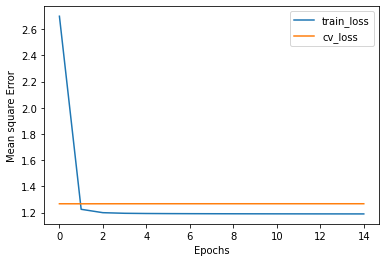

In [ ]:
plt.plot(list(range(15)),epoch_losstr,label='train_loss')
plt.plot(list(range(15)),epoch_losscv,label='cv_loss')
plt.xlabel('Epochs')
plt.ylabel('Mean square Error')
plt.legend()
plt.show()

In [ ]:
print(user_bias.shape)
print(movie_bias.shape)
print(user_matrix.shape)
print(movie_matrix.shape)

(943,)
(1681,)
(943, 100)
(1681, 100)


#**TASK 2:**

In [ ]:
y=user_male['is_male']
print(y.shape)
y_class,y_count=np.unique(y,return_counts=True)
print(y_class)
print(y_count)

(943,)
['0' '1']
[273 670]


In [ ]:
from sklearn.model_selection import train_test_split
Xtr,Xcv,ytr,ycv=train_test_split(user_matrix,y,test_size=0.1,random_state=9)
print(Xtr.shape,ytr.shape)
print(Xcv.shape,ycv.shape)

(848, 100) (848,)
(95, 100) (95,)


In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=1)
log.fit(Xtr,ytr)
result_tr=log.predict(Xtr)
result_cv=log.predict(Xcv)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_tr=confusion_matrix(ytr,result_tr)
confusion_cv=confusion_matrix(ycv,result_cv)
print(confusion_tr)
print(confusion_cv)

[[  0 243]
 [  0 605]]
[[ 0 30]
 [ 0 65]]


Observation:
Tried with 100 features but the results are not good,since the model predicts everything to be positive its a bias model.Hence lets increase the number of features to 200 and see what happens..

In [ ]:
epoch_losstr1,epoch_losscv1,user_bias1,movie_bias1,user_matrix1,movie_matrix1=recommendation(943,1681,200,15,X_train,X_cv,0.001,10,average_rating)
















  0%|          | 0/15 [00:00<?, ?it/s]

0 epoch
[4.228588020012037] trainloss

















  7%|▋         | 1/15 [00:22<05:16, 22.59s/it]

[1.267070444795512] losscv
1 epoch
[4.228588020012037, 1.2346869067611188] trainloss

















 13%|█▎        | 2/15 [00:45<04:54, 22.66s/it]

[1.267070444795512, 1.2667540470186918] losscv
2 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589] trainloss

















 20%|██        | 3/15 [01:08<04:32, 22.72s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425] losscv
3 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972] trainloss

















 27%|██▋       | 4/15 [01:31<04:10, 22.75s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872] losscv
4 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893] trainloss

















 33%|███▎      | 5/15 [01:54<03:48, 22.80s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028] losscv
5 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802] trainloss

















 40%|████      | 6/15 [02:16<03:25, 22.83s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897] losscv
6 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198] trainloss

















 47%|████▋     | 7/15 [02:39<03:03, 22.88s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412] losscv
7 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854] trainloss

















 53%|█████▎    | 8/15 [03:02<02:40, 22.91s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254] losscv
8 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393] trainloss

















 60%|██████    | 9/15 [03:25<02:17, 22.85s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748] losscv
9 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393, 1.1897740685562508] trainloss

















 67%|██████▋   | 10/15 [03:48<01:54, 22.85s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748, 1.2671601656433429] losscv
10 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393, 1.1897740685562508, 1.189635622037377] trainloss

















 73%|███████▎  | 11/15 [04:11<01:31, 22.83s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748, 1.2671601656433429, 1.267161063036887] losscv
11 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393, 1.1897740685562508, 1.189635622037377, 1.1895087919139293] trainloss

















 80%|████████  | 12/15 [04:34<01:08, 22.83s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748, 1.2671601656433429, 1.267161063036887, 1.2671615747035538] losscv
12 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393, 1.1897740685562508, 1.189635622037377, 1.1895087919139293, 1.1893932804531269] trainloss

















 87%|████████▋ | 13/15 [04:57<00:45, 22.87s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748, 1.2671601656433429, 1.267161063036887, 1.2671615747035538, 1.2671619004190044] losscv
13 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393, 1.1897740685562508, 1.189635622037377, 1.1895087919139293, 1.1893932804531269, 1.1892883210049083] trainloss

















 93%|█████████▎| 14/15 [05:19<00:22, 22.85s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748, 1.2671601656433429, 1.267161063036887, 1.2671615747035538, 1.2671619004190044, 1.2671621308827183] losscv
14 epoch
[4.228588020012037, 1.2346869067611188, 1.1959336790082589, 1.1915464535306972, 1.1907145409246893, 1.1904349397533802, 1.1902498244871198, 1.1900825746428854, 1.1899235864319393, 1.1897740685562508, 1.189635622037377, 1.1895087919139293, 1.1893932804531269, 1.1892883210049083, 1.1891929480692305] trainloss

















100%|██████████| 15/15 [05:42<00:00, 22.84s/it]

[1.267070444795512, 1.2667540470186918, 1.266920324472425, 1.2670353458836872, 1.2670995267029028, 1.2671319357696897, 1.2671475419924412, 1.2671549273660254, 1.267158442003748, 1.2671601656433429, 1.267161063036887, 1.2671615747035538, 1.2671619004190044, 1.2671621308827183, 1.267162307755515] losscv


In [ ]:
Xtr1,Xcv1,ytr1,ycv1=train_test_split(user_matrix1,y,test_size=0.1,random_state=9)
print(Xtr1.shape,ytr1.shape)
print(Xcv1.shape,ycv1.shape)

(848, 200) (848,)
(95, 200) (95,)


In [ ]:
log1=LogisticRegression()
log1.fit(Xtr1,ytr1)
result_tr1=log1.predict(Xtr1)
result_cv1=log1.predict(Xcv1)

In [ ]:
confusion1_tr=confusion_matrix(ytr1,result_tr1)
confusion_cv=confusion_matrix(ycv1,result_cv1)
print(confusion1_tr)
print(confusion_cv)

[[  0 243]
 [  0 605]]
[[ 0 30]
 [ 0 65]]


Observation:
Even tried with 200 features but still the results didnt changed,its predicting everything to be as one,its a biased model,maybe i assume the user features has got nothing to do with gender.
